<a href="https://colab.research.google.com/github/Yin-Tzu/predict_DA_reaction_product2/blob/main/2divided_ring_Cnumber/divided_to_5ring_or_6ring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import cv2
import copy
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
xy=np.load('1200X300X300.zip')
X_train, y_train_label, X_test, y_test_label,X_valid,y_valid_label=xy['X_train'],xy['y_train_label'],xy['X_test'],xy['y_test_label'],xy['X_valid'],xy['y_valid_label']


In [ ]:
y_TrainOneHot = tf.keras.utils.to_categorical(y_train_label)  # One-Hot编码
y_TestOneHot = tf.keras.utils.to_categorical(y_test_label)
y_ValidOneHot = tf.keras.utils.to_categorical(y_valid_label)  # One-Hot编码
print(X_train.shape, y_train_label.shape, X_test.shape, y_test_label.shape,X_valid.shape,y_valid_label.shape)
tStart = time.time()#計時開始

model = tf.keras.models.Sequential()  # 调用Sequential模型
model.add(layers.Conv2D(input_shape=(300,300, 3), filters=16, kernel_size=(3,3), kernel_initializer='TruncatedNormal', strides=1, padding='same', activation='relu', name='conv1',kernel_regularizer=regularizers.l2(0.001)))  # 10*10
model.add(layers.AveragePooling2D(pool_size=(3,3), strides=2, padding='same', name='pool1'))  # 5*5
model.add(layers.Conv2D(filters=16, kernel_size=(3,3), kernel_initializer='TruncatedNormal', strides=1, padding='same', activation='relu', name='conv3',kernel_regularizer=regularizers.l2(0.001)))  # 10*10
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='same', name='pool3'))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), kernel_initializer='TruncatedNormal', strides=1, padding='same', activation='relu', name='conv2',kernel_regularizer=regularizers.l2(0.001)))  # 10*10
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='same', name='pool2'))  # 5*5
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), kernel_initializer='TruncatedNormal', strides=1, padding='same', activation='relu', name='conv4',kernel_regularizer=regularizers.l2(0.001)))  # 10*10
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='same', name='pool4'))  # 5*5
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), kernel_initializer='TruncatedNormal', strides=1, padding='same', activation='relu', name='conv5',kernel_regularizer=regularizers.l2(0.001)))  # 10*10
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='same', name='pool5'))  # 5*5
#model.add(layers.Flatten(name='flatten'))
#model.add(layers.Dense(units=64, kernel_initializer='TruncatedNormal', activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.03))  #在 0 和 1 之间浮动。需要丢弃的输入比例。
model.add(layers.Dense(units=2,kernel_initializer='TruncatedNormal', activation='softmax'))#,input_dim=100

print(model.summary())
#batch_size = 2
# 模型的训练 编译模型
opt = tf.keras.optimizers.Adam(learning_rate=0.00004)# 3*3
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])  # metrics是训练和测试期间的模型评估标准。

# 监控val_loss，当连续40轮变化小于0.0001时启动early stopping
#es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40, min_delta=0.0001)

# 训练模型
train_history = model.fit(x=X_train, y=y_TrainOneHot, validation_data=(X_valid, y_ValidOneHot), epochs=400, batch_size=90, verbose=2)
#train_history = model.fit_generator(generator(X_train, y_train_label, batch_size), epochs=100, steps_per_epoch=len(X_train)// batch_size,validation_data=generator(X_valid, y_valid_label, batch_size),validation_steps=len(X_valid) // batch_size, verbose=2,workers=5, use_multiprocessing=True)#validation_data=generator(X_test, y_test_label, batch_size),validation_steps=len(X_test) // batch_size
# 查看训练过程，之前的训练步骤的值都保存在这里面。这里共有loss,accuracy,val_loss,val_accuracy四个参数
print(train_history.history)

# 將模型儲存至 HDF5 檔案中
model.save('my_model2.h5')  # creates a HDF5 file 'my_model.h5'

scores = model.evaluate(X_test,y_TestOneHot)
#scores = model.evaluate_generator(generator(X_test, y_test_label, batch_size),steps=len(X_test)// batch_size)
print('loss, accuracy=',scores) #显示测试准确率[1]

prediction = model.predict_classes(X_test)
# 返回预测属于某标签的概率
y_score = model.predict_proba(X_test)

t2 = time.time()#計時結束
#列印結果
print("It cost %f sec" % (t2 - tStart))  #會自動做近位
print(t2 - tStart)  #原型長這樣

(1440, 300, 300, 3) (1440,) (480, 300, 300, 3) (480,) (480, 300, 300, 3) (480,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 300, 300, 16)      448       
_________________________________________________________________
pool1 (AveragePooling2D)     (None, 150, 150, 16)      0         
_________________________________________________________________
conv3 (Conv2D)               (None, 150, 150, 16)      2320      
_________________________________________________________________
pool3 (MaxPooling2D)         (None, 75, 75, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 75, 75, 32)        4640      
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 38, 38, 32)        0         
__________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


It cost 733.158505 sec
733.1585054397583


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


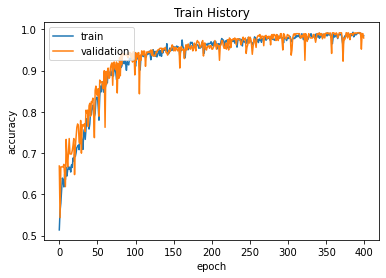

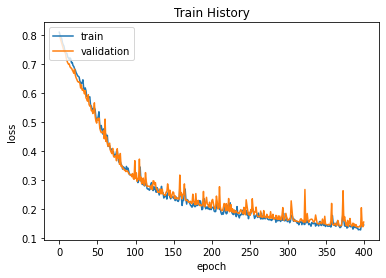

predict    0    1
label            
0        240    0
1          6  234


In [ ]:

prediction = model.predict_classes(X_test)
def show_train_history(train_history, train, validation):  # 訓練集驗證準確度對epoch做圖
    plt.plot(train_history.history[train])  # 绘制训练数据的执行结果
    plt.plot(train_history.history[validation])  # 绘制验证数据的执行结果
    plt.title('Train History')  # 图标题
    plt.xlabel('epoch')  # x轴标签
    plt.ylabel(train)  # y轴标签
    plt.legend(['train', 'validation'], loc='upper left')  # 添加左上角图例
    plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')

show_train_history(train_history, 'loss', 'val_loss')

print(pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict']))   # https://zhuanlan.zhihu.com/p/52368125  其他呈現交叉表方法(平均、彩色圖...)